In [1]:
import numpy as np
import pandas as pd
import model
import nessra_genes_sets_generator as ng
import mygene 
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [11]:
#------------ SVM ANALYSIS ------------
def svmModel(matrix_t, list_of_sets, obj):
    mat = model.select_table(matrix_t, list_of_sets)
    print("Transpose matrix filtered shape: {}".format(mat.shape))
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(mat.values, obj.values, test_size=0.3,random_state=100) # 70% training and 30% test
    # Define the scaler 
    scaler = StandardScaler().fit(X_train)
    # Scale the train set
    X_train = scaler.transform(X_train)
    # Scale the test set
    X_test = scaler.transform(X_test)
    
    #model training
    clf_ns = model.training(X_train, y_train)

    y_pred = clf_ns.predict(X_test)
    print("")
    print("---- SVM ----")
    print("Proportion of 0s in test y: {}".format(len([x for x in y_test if x <1])/len(y_test)))
    print("Proportion of 0s in prediction y: {}".format(len([x for x in y_pred if x <1])/len(y_pred)))
    print("")
    print(y_test)
    print(y_pred)
    print("AUC:", metrics.roc_auc_score(y_test, y_pred))
    
    return(clf_ns)

def BayesModel(matrix_t, list_of_sets, obj, i):
    mat = model.select_table(matrix_t, list_of_sets)
    #print("Transpose matrix filtered shape: {}".format(mat.shape))
    
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(mat.values, obj.values, test_size=0.3,random_state=i) # 70% training and 30% test
    # Define the scaler 
    scaler = StandardScaler().fit(X_train)
    # Scale the train set
    X_train = scaler.transform(X_train)
    # Scale the test set
    X_test = scaler.transform(X_test)

    #Create a Gaussian Classifier
    g_model = GaussianNB()

    # Train the model using the training sets
    g_model.fit(X_train,y_train)

    predicted= g_model.predict(X_test)
    '''
    print("---- Naive Bayes ----")
    print("Proportion of 0s in test y: {}".format(round(len([x for x in y_test if x <1])/len(y_test), 4)))
    print("Proportion of 0s in prediction y: {}".format(round(len([x for x in predicted if x <1])/len(predicted),4)))
    print("")
    print(y_test)
    print(predicted)
    print("AUC:",round(metrics.roc_auc_score(y_test, predicted), 4))
    '''
    
    return round(metrics.roc_auc_score(y_test, predicted), 4)

# Matrix and Objective vector preparation

In [13]:
#------------- MATRIX and CLASS VECTOR
matrix = pd.read_csv(r"~/Documents/UniTn/DataMiningLab/expressionMatrix5.tsv", sep = "\t", header=0)
#class_vector = pd.read_csv("~/GoogleDrive/DataMiningLab/Model/objective.tsv", sep = "\t", header=0)
print("Matrix shape: {}".format(matrix.shape))
#print(matrix.head(2))
print("")

# transposing matrix
matrix_t = matrix.T
matrix_t.columns = matrix_t.iloc[0]
matrix_t = matrix_t.drop("Gene_ID", axis=0)

print("Transpose matrix shape: {}".format(matrix_t.shape))
print("")


# class vector 
class_vector = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\objective.tsv", sep = "\t", header=0)
print("Objective shape: {}".format(class_vector.shape))  

# generating barcode of samples
samples_bar = []
for name in list(matrix_t.index.values):
    samples_bar.append(name[:-4])
fil_for_class = class_vector.barcode.isin(samples_bar)
class_vector = class_vector[fil_for_class]
print("Objective shape after filter for matrix samples: {}".format(class_vector.shape))

# Final vector for classifying
obj = class_vector["over5years"]
print("Final obj vector for classication is a {}, len: {}".format(type(obj), len(obj)))
print("")

Matrix shape: (60482, 103)

Transpose matrix shape: (102, 60482)

Objective shape: (104, 3)
Objective shape after filter for matrix samples: (102, 3)
Final obj vector for classication is a <class 'pandas.core.series.Series'>, len: 102



# CorEX genes analysis

In [ ]:
corex_mis = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\corex_mis.tsv", sep = "\t")
corex_mis.shape


In [11]:
coding_filter = pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\protein_coding_genes.v22.annotation.txt", sep=" ", header=None)
cd_genes = list(coding_filter.iloc[:,3])
cod_genes = []
for name in cd_genes:
    temp_split = name.split(".")
    cod_genes.append(temp_split[0])

'''for i in range(200):
    cluster_id = i
    n_genes = 1000000'''

genes = []
for name in c_genes:
    if name.split(".")[0] in cod_genes:
        genes.append(name)
print(len(genes))
#print(list(map(lambda x: x.split('.')[0], genes)))

644


In [2]:
#Gene symbol conversion
mg = mygene.MyGeneInfo()
lst=['ENSG00000146083', 'ENSG00000022567', 'ENSG00000112511',
       'ENSG00000173276', 'ENSG00000184014', 'ENSG00000159082',
       'ENSG00000198642', 'ENSG00000058272', 'ENSG00000110713',
       'ENSG00000033327', 'ENSG00000115464', 'ENSG00000183049',
       'ENSG00000167522', 'ENSG00000166987', 'ENSG00000153339',
       'ENSG00000163660', 'ENSG00000070495', 'ENSG00000123353',
       'ENSG00000153207', 'ENSG00000114648', 'ENSG00000102908',
       'ENSG00000168066', 'ENSG00000119638', 'ENSG00000143324',
       'ENSG00000217128', 'ENSG00000061656', 'ENSG00000087206',
       'ENSG00000037637', 'ENSG00000139697', 'ENSG00000143442',
       'ENSG00000164978', 'ENSG00000023287', 'ENSG00000109787',
       'ENSG00000135049', 'ENSG00000038219', 'ENSG00000135250',
       'ENSG00000156639', 'ENSG00000157869', 'ENSG00000170871',
       'ENSG00000109381', 'ENSG00000100030', 'ENSG00000173757',
       'ENSG00000139946', 'ENSG00000137312', 'ENSG00000231074',
       'ENSG00000157764', 'ENSG00000161920', 'ENSG00000177463',
       'ENSG00000147454', 'ENSG00000067900', 'ENSG00000198740',
       'ENSG00000172262', 'ENSG00000204348', 'ENSG00000083896',
       'ENSG00000117625', 'ENSG00000169057', 'ENSG00000166501',
       'ENSG00000156110', 'ENSG00000173273', 'ENSG00000139631',
       'ENSG00000077458', 'ENSG00000151466', 'ENSG00000114982',
       'ENSG00000104885', 'ENSG00000100226', 'ENSG00000162642',
       'ENSG00000058091', 'ENSG00000076108', 'ENSG00000127481',
       'ENSG00000116679', 'ENSG00000213516', 'ENSG00000101751',
       'ENSG00000078304', 'ENSG00000147050', 'ENSG00000164327',
       'ENSG00000178974', 'ENSG00000120616', 'ENSG00000147383',
       'ENSG00000153815', 'ENSG00000164715', 'ENSG00000146416',
       'ENSG00000160584']
ens2sym = mg.querymany(list(map(lambda x: x.split('.')[0], lst)), scopes='ensemblgene', fields='symbol', as_dataframe=True, returnall=False)
ens2sym = ens2sym.loc[ens2sym['notfound'] != True, 'symbol']
print('\n'.join(ens2sym))

querying 1-82...done.
Finished.


KeyError: 'notfound'

In [43]:
#clusters = range(10)
#cardinalities = [1343,345,17,17,12,42,34,18,22,27]
clusters = [0]
cardinalities = [1343]

c_genes = [model.select_genes(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\corex_mis.tsv", cluster_id, n_genes) for cluster_id, n_genes in zip(clusters, cardinalities)]

import itertools
c_genes = list(itertools.chain.from_iterable(c_genes))
print("Len of selected genes: {}".format(len(c_genes)))
print(c_genes)

Len of selected genes: 1343
['ENSG00000266621.1', 'ENSG00000251775.1', 'ENSG00000242531.1', 'ENSG00000239483.1', 'ENSG00000199237.1', 'ENSG00000212175.1', 'ENSG00000265280.1', 'ENSG00000221520.1', 'ENSG00000234604.2', 'ENSG00000278420.1', 'ENSG00000268154.2', 'ENSG00000207336.1', 'ENSG00000261140.1', 'ENSG00000266151.1', 'ENSG00000266017.1', 'ENSG00000200814.1', 'ENSG00000206926.1', 'ENSG00000272966.1', 'ENSG00000279571.1', 'ENSG00000200152.1', 'ENSG00000212533.1', 'ENSG00000222108.1', 'ENSG00000252759.1', 'ENSG00000201988.2', 'ENSG00000202078.1', 'ENSG00000252391.1', 'ENSG00000256746.4', 'ENSG00000207704.2', 'ENSG00000238317.2', 'ENSG00000273196.1', 'ENSG00000264932.3', 'ENSG00000277052.1', 'ENSG00000229414.2', 'ENSG00000264878.1', 'ENSG00000266644.1', 'ENSG00000251821.1', 'ENSG00000252206.1', 'ENSG00000256452.1', 'ENSG00000252919.1', 'ENSG00000237914.4', 'ENSG00000201388.1', 'ENSG00000231128.4', 'ENSG00000250950.1', 'ENSG00000252756.1', 'ENSG00000224967.1', 'ENSG00000231395.1', 'ENSG

In [ ]:
# Bayes

auc_scores = []
for i in range(1,1300):
    c_genes = model.select_genes(corex_mis, cluster_id, i)
    auc = BayesModel(matrix_t, [set(c_genes)], obj)
    auc_scores.append(auc)


In [ ]:
print(np.argmin(auc_scores[200:]) + 200)
print(auc_scores[500])
plt.plot(range(1,1300), auc_scores)


In [ ]:
auc268_500 = auc_scores[268:500]

ch_rate = [auc268_500[0]]
for el in range(1,len(auc268_500)):
    rate = auc268_500[el] - auc268_500[el-1]
    ch_rate.append(rate)
index_up_genes = [i+268 for i in range(len(ch_rate)) if ch_rate[i] > 0]
print(len(index_up_genes))

genes_int1 = list(map(lambda x: c_genes[x], index_up_genes))

auc700_800 = auc_scores[700:800]

ch_rate = [auc700_800[0]]
for el in range(1,len(auc700_800)):
    rate = auc700_800[el] - auc700_800[el-1]
    ch_rate.append(rate)
index_up_genes = [i+700 for i in range(len(ch_rate)) if ch_rate[i] > 0]
print(len(index_up_genes))

genes_int2 = list(map(lambda x: c_genes[x], index_up_genes))



In [ ]:
auc1 = BayesModel(matrix_t, [set(genes_int1), set(genes_int2)], obj)
print(auc1)



auc2 = BayesModel(matrix_t, [set(genes_int1)], obj)
print(auc2)


In [ ]:
acc = []
for i in range(400):
    j = i+50
    auc = BayesModel(matrix_t, [set(c_genes)], obj, j)
    acc.append(auc)
x = [i for i in range(len(acc))]
plt.plot(x, acc)
np.mean(acc)

0.5644962499999999

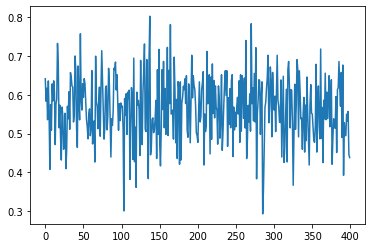

In [38]:
acc = []
for i in range(400):
    j = i+50
    auc = BayesModel(matrix_t, [set(genes)], obj, j)
    acc.append(auc)
x = [i for i in range(len(acc))]
plt.plot(x, acc)
np.mean(acc)

In [ ]:
genes_list = list(set(genes_int1).union(set(genes_int2)))

new_list = []
for name in genes_list:
    temp_split = name.split(".")
    new_list.append(temp_split[0])
print(len(new_list))
print(", ".join(new_list))


In [10]:
tab=pd.read_csv(r"C:\Users\aless\Documents\UniTn\DataMiningLab\FinalReport\corex_mis.tsv", header=0, index_col=0, sep='\t')
tab.head()
c_genes=tab.columns.values